In [1]:
import numpy 

train_images = numpy.load("train_images.npy")
train_labels = numpy.load("train_labels.npy")

test_images = numpy.load("test_images.npy")
test_labels = numpy.load("test_labels.npy")

train_features = numpy.load("train_features.npy")
test_features = numpy.load("test_features.npy")

In [2]:
train_images.shape

(40000, 48, 48, 3)

Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./1/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.6287, 'AUC-ROC': 0.68387542, 'Precision': 0.7434733257661748, 'Recall': 0.393, 'F1-score': 0.514195996336517}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./1/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.6346, 'AUC-ROC': 0.69921478, 'Precision': 0.8050770625566637, 'Recall': 0.3552, 'F1-score': 0.4929225645295587}
Trying HistGradientBoostingClassifier - HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Got the result from ./1/predictions/HistGradientBoostingClassifier.npy
{'classifier': 'Град. бустинг на основе гистограмм', 'Accuracy': 0.6277, 'AUC-ROC': 0.70693232, 'Precision': 0.838009528851244, 'Recall': 0.3166

,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score
0,Метод k ближайших соседей,0.6287,0.683875,0.743473,0.3930,0.514196
1,Случайный лес,0.6346,0.699215,0.805077,0.3552,0.492923
2,Град. бустинг на основе гистограмм,0.6277,0.706932,0.838010,0.3166,0.459573
3,CatBoost,0.6579,0.712738,0.817962,0.4062,0.542830
4,XGBoost,0.6483,0.706888,0.811424,0.3864,0.523506
5,Нейронная сеть для тополог. признаков,0.6147,0.640268,0.656994,0.4800,0.554721
6,NaN,NaN,NaN,NaN,NaN,NaN
7,ResNet50 – базовая модель,0.6174,0.650764,0.657966,0.4890,0.561037
8,Комбинированная нейронная сеть,0.6113,0.637190,0.656805,0.4662,0.545327


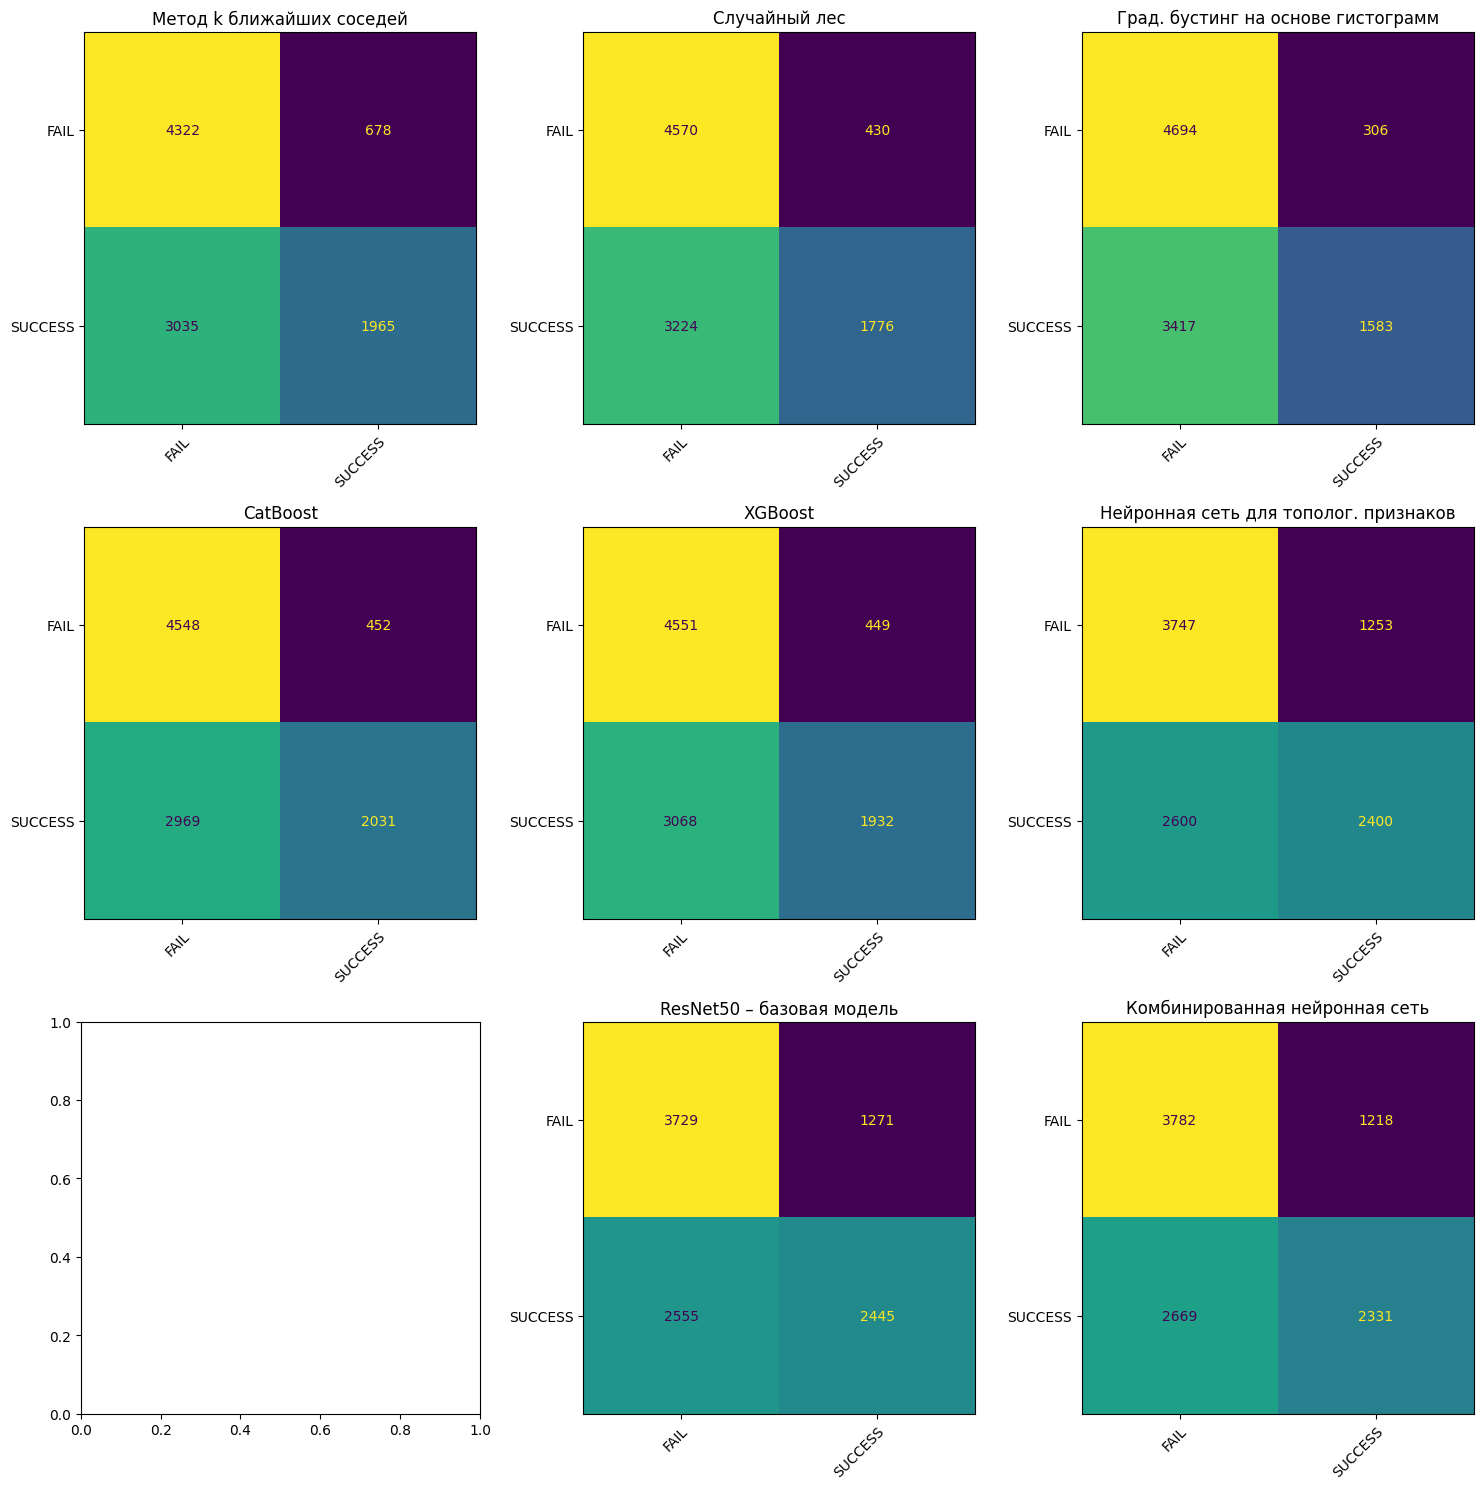

In [3]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, None,
    test_images, test_features, test_labels, None,
    without_diagrams = True, dump_name = "1/predictions",
    catboost_device = 'CPU', xgboost_device = 'cpu',
    only_get_from_dump = True, label_names = [ 'FAIL', 'SUCCESS' ]
)


In [4]:
predictions = numpy.argmax(numpy.load("1/predictions/CatBoostClassifier.npy"), axis = 1)
imgs1 = numpy.where((predictions != test_labels) & numpy.isin(test_labels, 0))[0]
imgs2 = numpy.where((predictions != test_labels) & numpy.isin(test_labels, 1))[0]
imgs3 = numpy.where((predictions == test_labels) & numpy.isin(test_labels, 0))[0]
imgs4 = numpy.where((predictions == test_labels) & numpy.isin(test_labels, 1))[0]
print(imgs1, imgs2)
len(imgs1), len(imgs2)

[  12   46   51   57   61   89  101  116  119  128  142  152  181  183
  190  192  217  237  239  289  323  324  325  326  354  358  365  369
  404  407  408  417  422  426  437  442  460  468  508  523  530  540
  550  585  588  600  664  685  704  716  723  728  731  735  755  778
  780  782  789  793  801  803  808  824  837  858  862  867  872  873
  893  902  909  924  942  945  950  966  968  969  988  997 1001 1010
 1014 1028 1039 1040 1055 1083 1109 1122 1134 1148 1185 1207 1218 1219
 1236 1241 1243 1258 1267 1275 1298 1318 1329 1342 1381 1395 1396 1398
 1399 1408 1421 1425 1433 1442 1449 1462 1463 1470 1488 1490 1501 1508
 1533 1540 1541 1582 1589 1610 1612 1650 1664 1671 1680 1683 1724 1727
 1742 1744 1757 1758 1770 1773 1779 1780 1782 1793 1796 1821 1831 1835
 1848 1851 1855 1865 1872 1874 1879 1897 1912 1929 1937 1954 1962 1970
 1981 1982 2006 2021 2025 2038 2045 2048 2064 2079 2097 2098 2103 2104
 2108 2124 2132 2134 2142 2147 2153 2154 2155 2170 2178 2183 2189 2191
 2198 

(452, 2969)

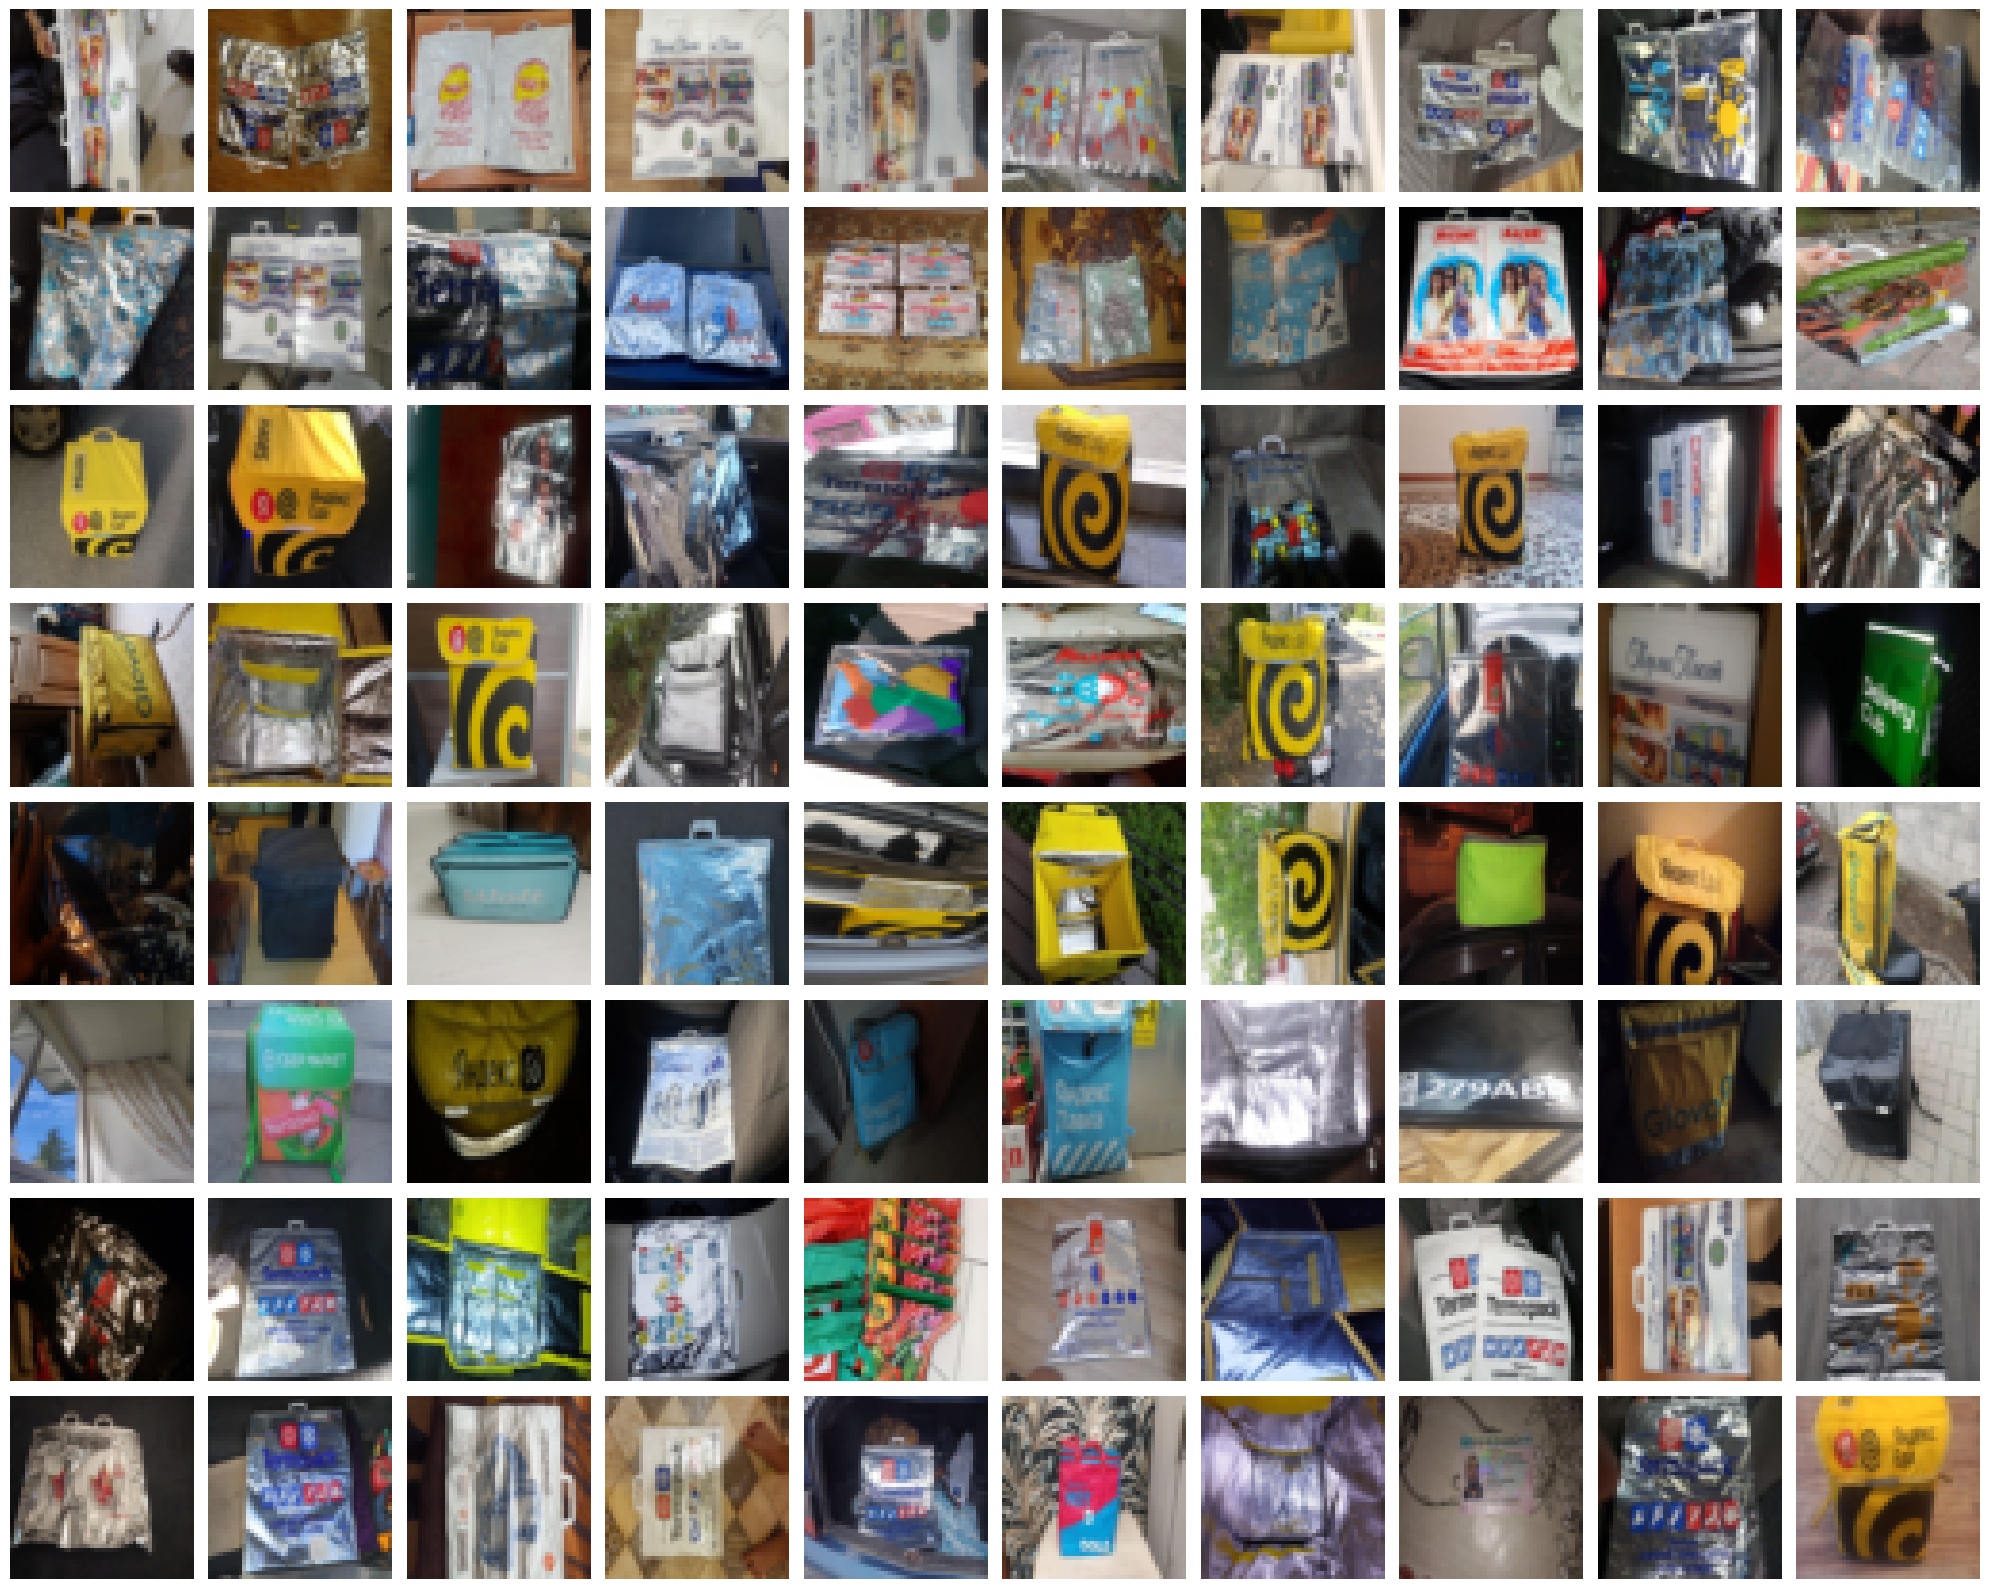

In [9]:
import PIL.Image
import matplotlib.pyplot as plt
figure, axes = plt.subplots(8, 10, figsize = (20, 16))

numpy.random.seed(42)

def output(img, file):
    os.makedirs(os.path.dirname(file), exist_ok = True)
    PIL.Image.fromarray((img * 255).astype(numpy.uint8)).save(file)

def draw(imgs, i1, i2):
    part = numpy.random.choice(imgs, size = 20)
    for i in range(10):
        axes[i1][i].imshow(test_images[part[i]])
        axes[i1][i].axis(False)
        
        axes[i2][i].imshow(test_images[part[i + 10]])
        axes[i2][i].axis(False)
        
        output(test_images[part[i]], f"gpt_control/{i1}/{i}.png")
        output(test_images[part[i + 10]], f"gpt_control/{i2}/{i}.png")

draw(imgs4, 0, 1)
draw(imgs2, 2, 3)
draw(imgs3, 4, 5)
draw(imgs1, 6, 7)

figure.tight_layout()

plt.savefig("1/predictions/error_examples.svg")
plt.savefig("1/predictions/error_examples.png")

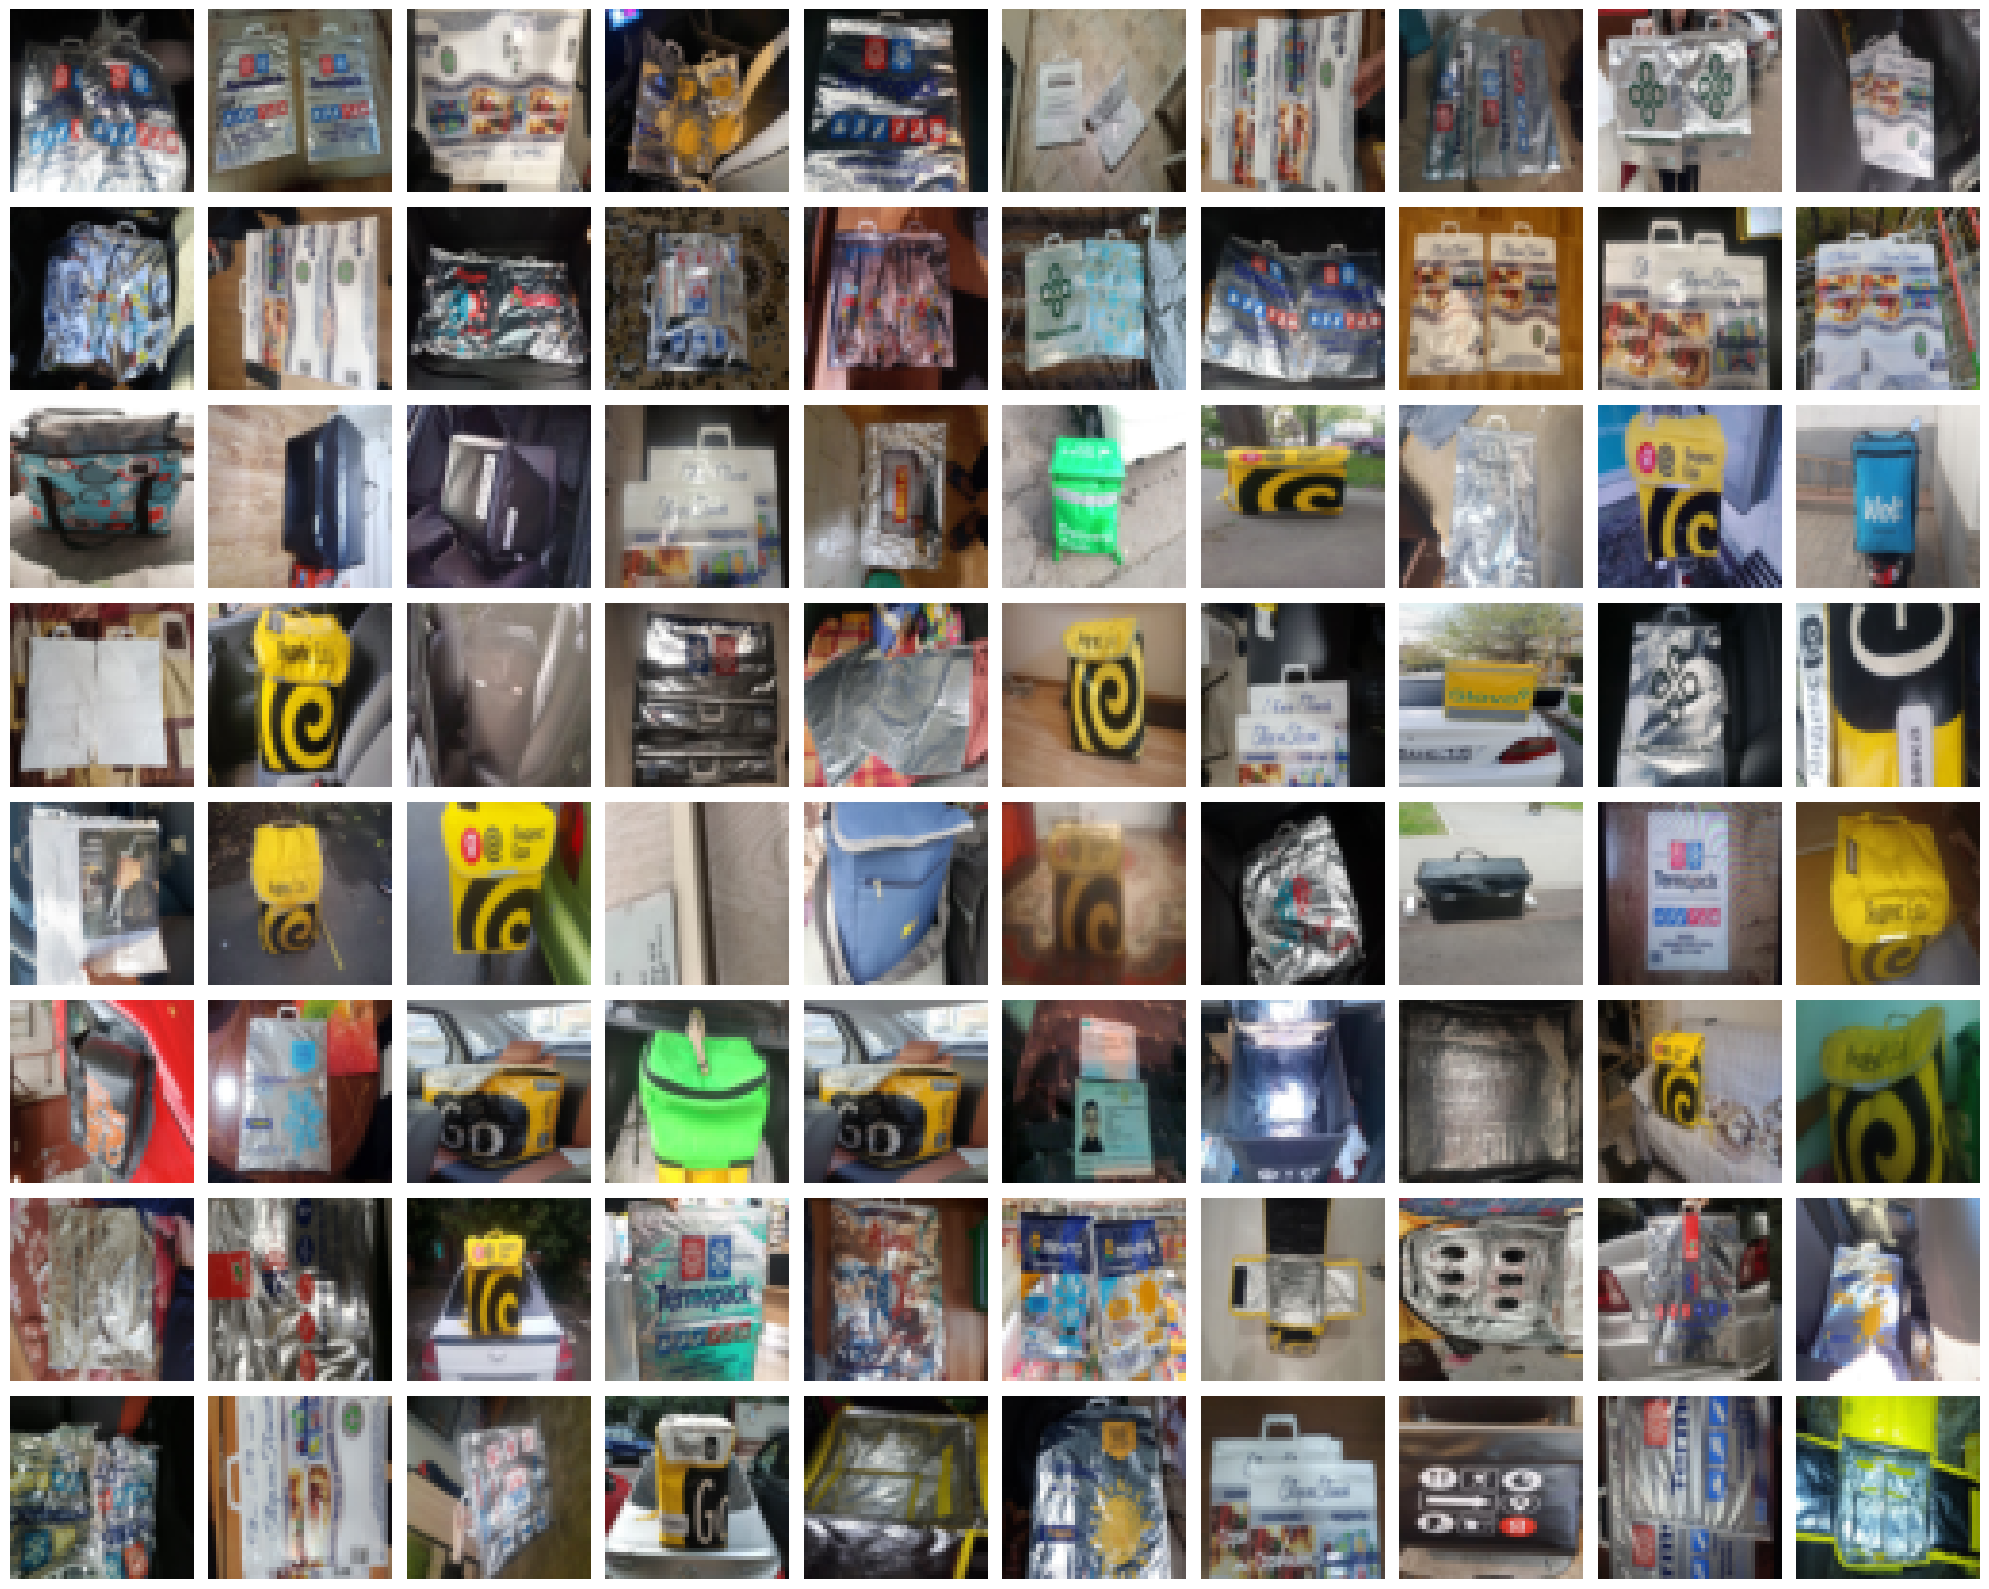

In [29]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(8, 10, figsize = (20, 16))

def draw(imgs, i1, i2):
    part = numpy.random.choice(imgs, size = 20)
    for i in range(10):
        axes[i1][i].imshow(test_images[part[i]])
        axes[i1][i].axis(False)
        
        axes[i2][i].imshow(test_images[part[i + 10]])
        axes[i2][i].axis(False)

draw(imgs4, 0, 1)
draw(imgs2, 2, 3)
draw(imgs3, 4, 5)
draw(imgs1, 6, 7)

figure.tight_layout()

plt.savefig("1/predictions/error_examples.svg")
plt.savefig("1/predictions/error_examples.png")